Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
# Training dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,labels='inferred',label_mode='categorical',
    batch_size=batch_size,image_size=(img_height,img_width),
    seed=123,validation_split=0.2,subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,labels='inferred',label_mode='categorical',
    batch_size=batch_size,image_size=(img_height,img_width),
    seed=123,validation_split=0.2,subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = val_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

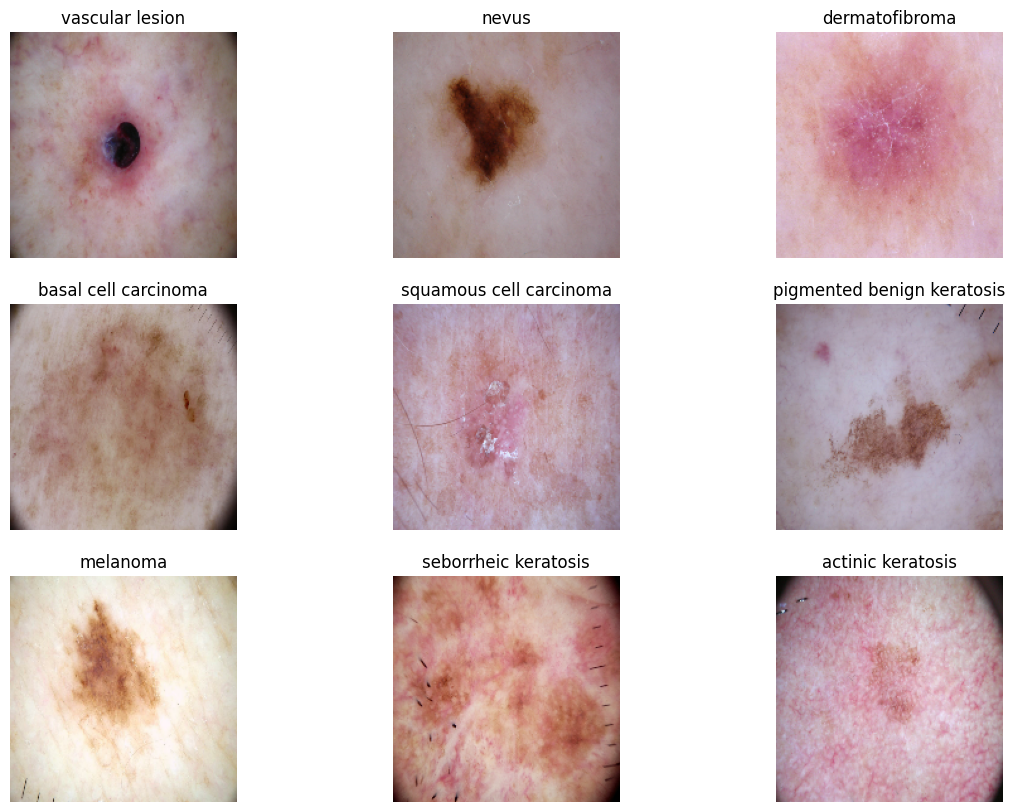

In [ ]:
l = []
j = 0
plt.figure(figsize=(14,10))
for (image_batch, label_batch) in val_ds.take(1):
    for i in range(32):
        if class_names[(np.argmax(label_batch.numpy(),axis=-1))[i]] not in l:
            plt.subplot(3, 3, j+1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[(np.argmax(label_batch.numpy(),axis=-1))[i]])
            plt.axis('off')
            l.append(class_names[(np.argmax(label_batch.numpy(),axis=-1))[i]])
            j+=1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
# Creating a CNN model
input_shape = (180,180,3)
model = Sequential()

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [11]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

### Train the model

In [12]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 396s 2s/step - loss: 1.9601 - accuracy: 0.2444 - val_loss: 1.7855 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 3s 56ms/step - loss: 1.6350 - accuracy: 0.4258 - val_loss: 1.7126 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 3s 56ms/step - loss: 1.5182 - accuracy: 0.4743 - val_loss: 1.4841 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 3s 55ms/step - loss: 1.3619 - accuracy: 0.5201 - val_loss: 1.4462 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 3s 56ms/step - loss: 1.3051 - accuracy: 0.5290 - val_loss: 1.4251 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 3s 58ms/step - loss: 1.2184 - accuracy: 0.5725 - val_loss: 1.3936 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 3s 55ms/step - loss: 1.1455 - accuracy: 0.5893 - val_loss: 1.4945 - val_accuracy: 0.4787
Epoch 8/20
56

### Visualizing training results

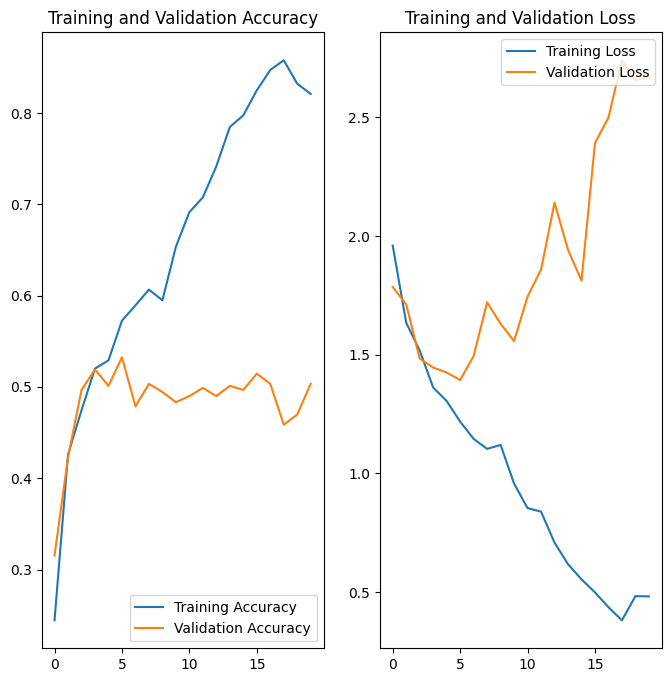

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
* The model has a training accuracy of 80% whereas the validation accuracy is only 50%. The model is **overfitting**.
* **Overfitting** can be seen from the loss plot, as the training loss decreases, the validation loss increases.

In [14]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Using rotation as a data augmentation strategy
image_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.8),
    layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical')
])

(-0.5, 179.5, 179.5, -0.5)

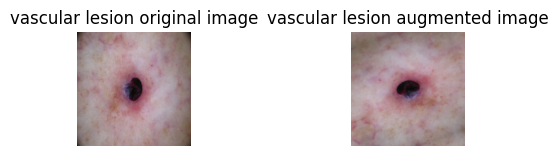

In [15]:
# visualizing the working of augmentation strategy for an image from the dataset
for (image,label) in val_ds.take(1):
  image = image.numpy().astype("uint8")
  label =label
plt.figure(figsize=(5,5))
plt.subplot(1, 3, 1)
plt.imshow(image[0])
plt.title(class_names[np.argmax(label[0],axis=-1)]+' original image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_augmentation(image[0]).numpy().astype("uint8"))
plt.title(class_names[np.argmax(label[0],axis=-1)]+' augmented image')
plt.axis('off')

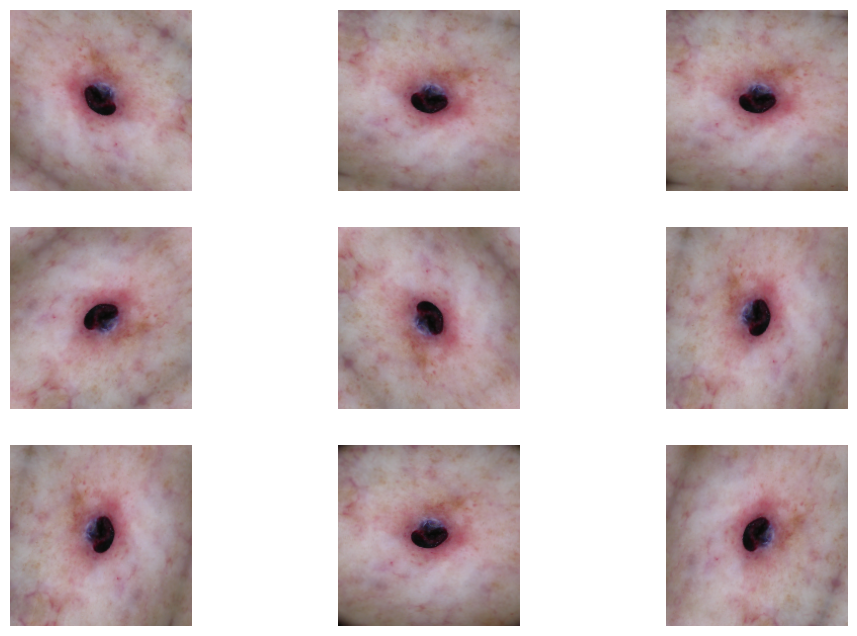

In [16]:
#Visualizing few other augmentations of the image above
plt.figure(figsize=(12,8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(image_augmentation(image[0]).numpy().astype("uint8"))
  plt.title('')
  plt.axis('off')

### Create the model, compile and train the model


In [17]:
## Creating CNN model with augmentation strategy
input_shape = (180,180,3)
model1 = Sequential()
model1.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.8))
model1.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'))
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model1.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model1.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(layers.MaxPool2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2, 2)))

model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2, 2)))

model1.add(layers.Dropout(0.25))

model1.add(layers.Flatten())
model1.add(layers.Dense(128,activation='relu'))

model1.add(layers.Dropout(0.35))

model1.add(layers.Dense(9, activation='softmax'))

### Compiling the model

In [18]:
model1.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

### Training the model

In [19]:
# training the model for 20 epochs
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 9s 86ms/step - loss: 2.0002 - accuracy: 0.2494 - val_loss: 1.8974 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 5s 82ms/step - loss: 1.8352 - accuracy: 0.3192 - val_loss: 1.6889 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 5s 82ms/step - loss: 1.6907 - accuracy: 0.3828 - val_loss: 1.5735 - val_accuracy: 0.4743
Epoch 4/20
56/56 [==============================] - 5s 82ms/step - loss: 1.5596 - accuracy: 0.4347 - val_loss: 1.5530 - val_accuracy: 0.4676
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 1.5352 - accuracy: 0.4587 - val_loss: 1.5542 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 5s 82ms/step - loss: 1.5583 - accuracy: 0.4604 - val_loss: 1.5066 - val_accuracy: 0.4698
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4613 - accuracy: 0.4866 - val_loss: 1.4094 - val_accuracy: 0.5168
Epoch 8/20
56

### Visualizing the results

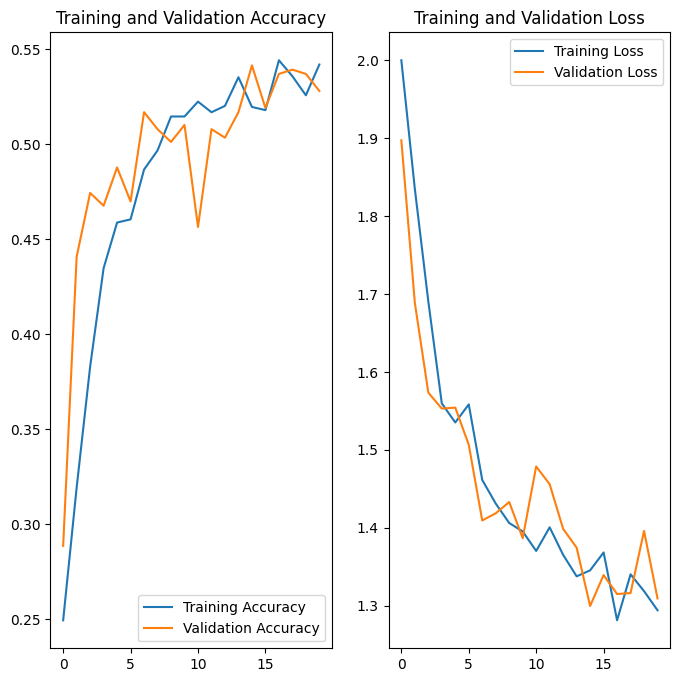

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings
* Though the model fit is poor with an accuracy of only around 50%, it is **not overfitting**.
* From the plots above it is seen that the training and validation accuracy are consistent with each other, eliminating overfitting.
* The training loss and validation loss also follows the same trend.

#### Finding the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
# creating training data
data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,labels='inferred',label_mode='categorical',
    batch_size=batch_size,image_size=(img_height,img_width),
    seed=123)
# creating a pandas dataframe to store the class names in training dataset
train_df = pd.DataFrame(columns = ['label'])
for (image,label) in data:
  for i in range(image.shape[0]):
    row = {'label':class_names[np.argmax(label[i],axis=-1)]}
    train_df = train_df.append(row,ignore_index=True)

Found 2239 files belonging to 9 classes.


In [22]:
# finding the count of each class in training dataset
train_df['label'].value_counts(normalize=True)*100

pigmented benign keratosis    20.634212
melanoma                      19.562305
basal cell carcinoma          16.793211
nevus                         15.944618
squamous cell carcinoma        8.083966
vascular lesion                6.208129
actinic keratosis              5.091559
dermatofibroma                 4.242966
seborrheic keratosis           3.439035
Name: label, dtype: float64

<Axes: >

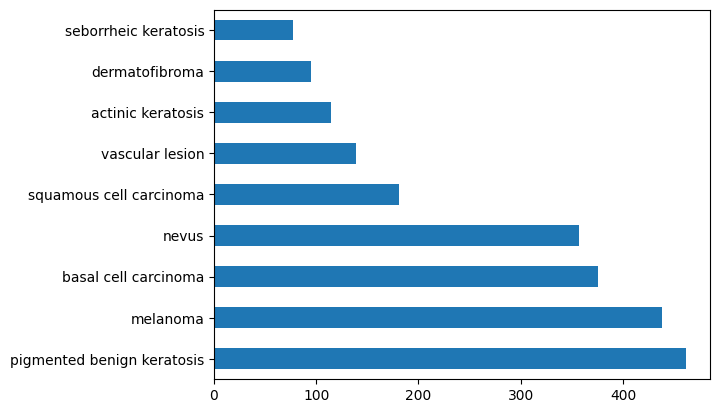

In [23]:
# Visualizing the distribution of classes
train_df['label'].value_counts().plot(kind='barh')

### Findings
#### - Which class has the least number of samples?
* **seborrheic keratosis** has the least amount of samples, around 77 samples

#### - Which classes dominate the data in terms proportionate number of samples?
* **pigmented benign keratosis** dominates the data with around 20% samples from this class


#### Rectifying the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7909D401B0A0>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7909D401BB20>: 100%|██████████| 500/500 [00:25<00:00, 19.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7909D4073AC0>: 100%|██████████| 500/500 [00:17<00:00, 28.24 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7909D45DCD60>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7909D460C790>: 100%|██████████| 500/500 [01:24<00:00,  5.94 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7909D4070160>: 100%|██████████| 500/500 [00:18<00:00, 27.58 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7909D4150F10>: 100%|██████████| 500/500 [00:41<00:00, 12.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7909D460C5B0>: 100%|██████████| 500/500 [00:17<00:00, 29.24 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7909D41FB4C0>: 100%|██████████| 500/500 [00:18<00:00, 26.36 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [29]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [30]:
df2 = pd.DataFrame(lesion_list_new,columns = ['label'])
new_df = train_df.append(df2)

In [31]:
new_df['label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [33]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  labels='inferred',label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  labels='inferred',label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
input_shape = (180,180,3)
model2 = Sequential()
model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model2.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model2.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

model2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

model2.add(layers.Dropout(0.5))

model2.add(layers.Flatten())

model2.add(layers.Dense(128,activation='relu'))
model2.add(layers.Dropout(0.25))

model2.add(layers.Dense(9, activation='softmax'))

In [43]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
model2.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 45s 244ms/step - loss: 1.9312 - accuracy: 0.2563 - val_loss: 1.7084 - val_accuracy: 0.3615
Epoch 2/30
169/169 [==============================] - 45s 256ms/step - loss: 1.5914 - accuracy: 0.3993 - val_loss: 1.5403 - val_accuracy: 0.4143
Epoch 3/30
169/169 [==============================] - 43s 244ms/step - loss: 1.4482 - accuracy: 0.4353 - val_loss: 1.3571 - val_accuracy: 0.4952
Epoch 4/30
169/169 [==============================] - 42s 243ms/step - loss: 1.3821 - accuracy: 0.4711 - val_loss: 1.2869 - val_accuracy: 0.5160
Epoch 5/30
169/169 [==============================] - 45s 260ms/step - loss: 1.2590 - accuracy: 0.5219 - val_loss: 1.2034 - val_accuracy: 0.5390
Epoch 6/30
169/169 [==============================] - 45s 255ms/step - loss: 1.2031 - accuracy: 0.5495 - val_loss: 1.2110 - val_accuracy: 0.5583
Epoch 7/30
169/169 [==============================] - 43s 249ms/step - loss: 1.1311 - accuracy: 0.5714 - val_loss: 1.1196 - val_ac

#### **Todo:**  Visualize the model results

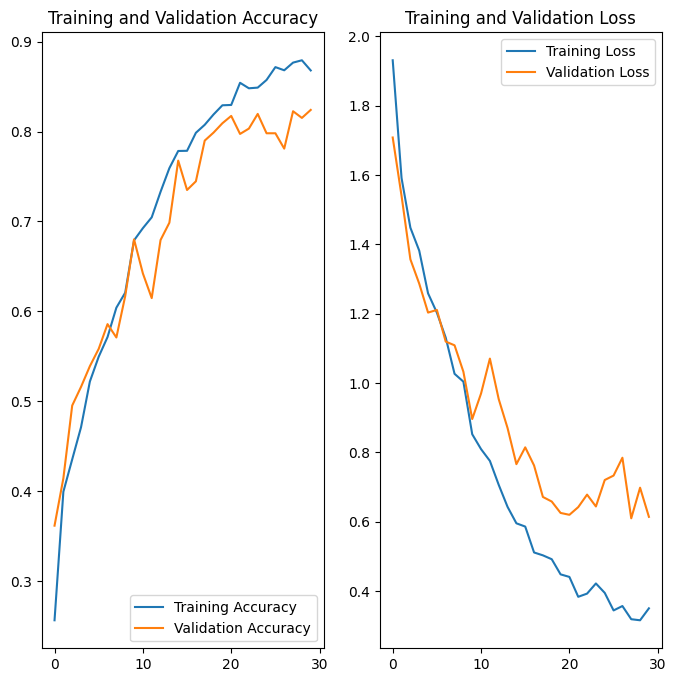

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyzing the results. Did the updated model get rid of underfitting/overfitting? Did class rebalance help?
* Using augmentor for class rebalance helped improve the validation accuracy to 82%.
* Data augmentation helped to overcome overfitting at the cost of accuracy.
* Class rebalance handled overfitting to a great extend with no compramise to the accuracy.
* It can be concluded that class rebalance helped improve the overall performance of the model.



### Model accuracy:
1. Initial Model:
    * Training Acc $\;\;\;$: 82%
    * Validation Acc : 50%
2. Model with data augmentation:
    * Training Acc $\;\;\;$: 54%
    * Validation Acc : 52%
3. Model with Class Rebalance:
    * Training Acc $\;\;\;$: 86%
    * Validation Acc : 82%